# **Importing Libraries**

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

# **Loading the dataset**

In [7]:
employee = pd.read_excel('/employee_burnout_analysis-AI 2.xlsx')

In [8]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [9]:
employee.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [10]:
employee.tail()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52
22749,fffe3400350031003800,2008-01-06,Male,Product,No,3,6.0,7.8,0.61


In [11]:
employee.shape

(22750, 9)

In [12]:
employee.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [13]:
# Finding Null Values
employee.isnull().sum()

,0
Employee ID,0
Date of Joining,0
Gender,0
Company Type,0
WFH Setup Available,0
Designation,0
Resource Allocation,1381
Mental Fatigue Score,2117
Burn Rate,1124


In [14]:
# Descriptive Statistics
employee[['Designation','Resource Allocation','Mental Fatigue Score','Burn Rate']].describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [15]:
employee.loc[employee['Burn Rate'].isnull(), 'Burn Rate']

,Burn Rate
45,NaN
47,NaN
52,NaN
91,NaN
122,NaN
...,...
22699,NaN
22706,NaN
22711,NaN
22733,NaN


In [16]:
# Removing observations which have 'NaN'.
employee = employee.dropna()
employee.shape

(18590, 9)

# **Checking with Outliers and Distribution of Data**

In [17]:
import seaborn as sns

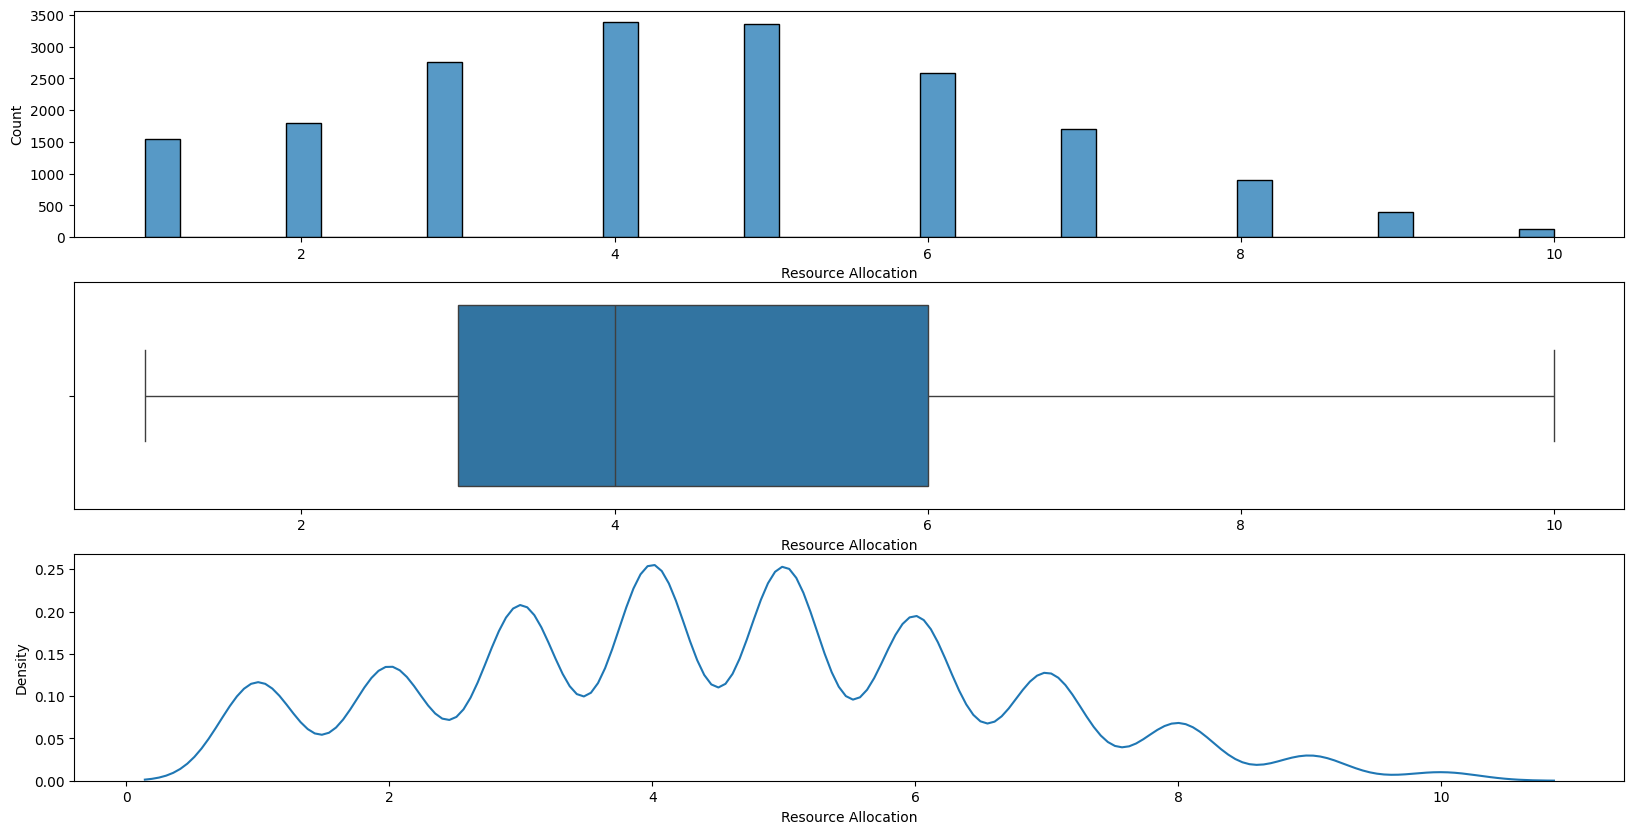

In [18]:
fig,ax=plt.subplots(3,1)
sns.histplot(employee['Resource Allocation'],ax=ax[0])
sns.boxplot(employee['Resource Allocation'],ax=ax[1],orient="h")
sns.kdeplot(employee['Resource Allocation'],ax=ax[2])
plt.show()

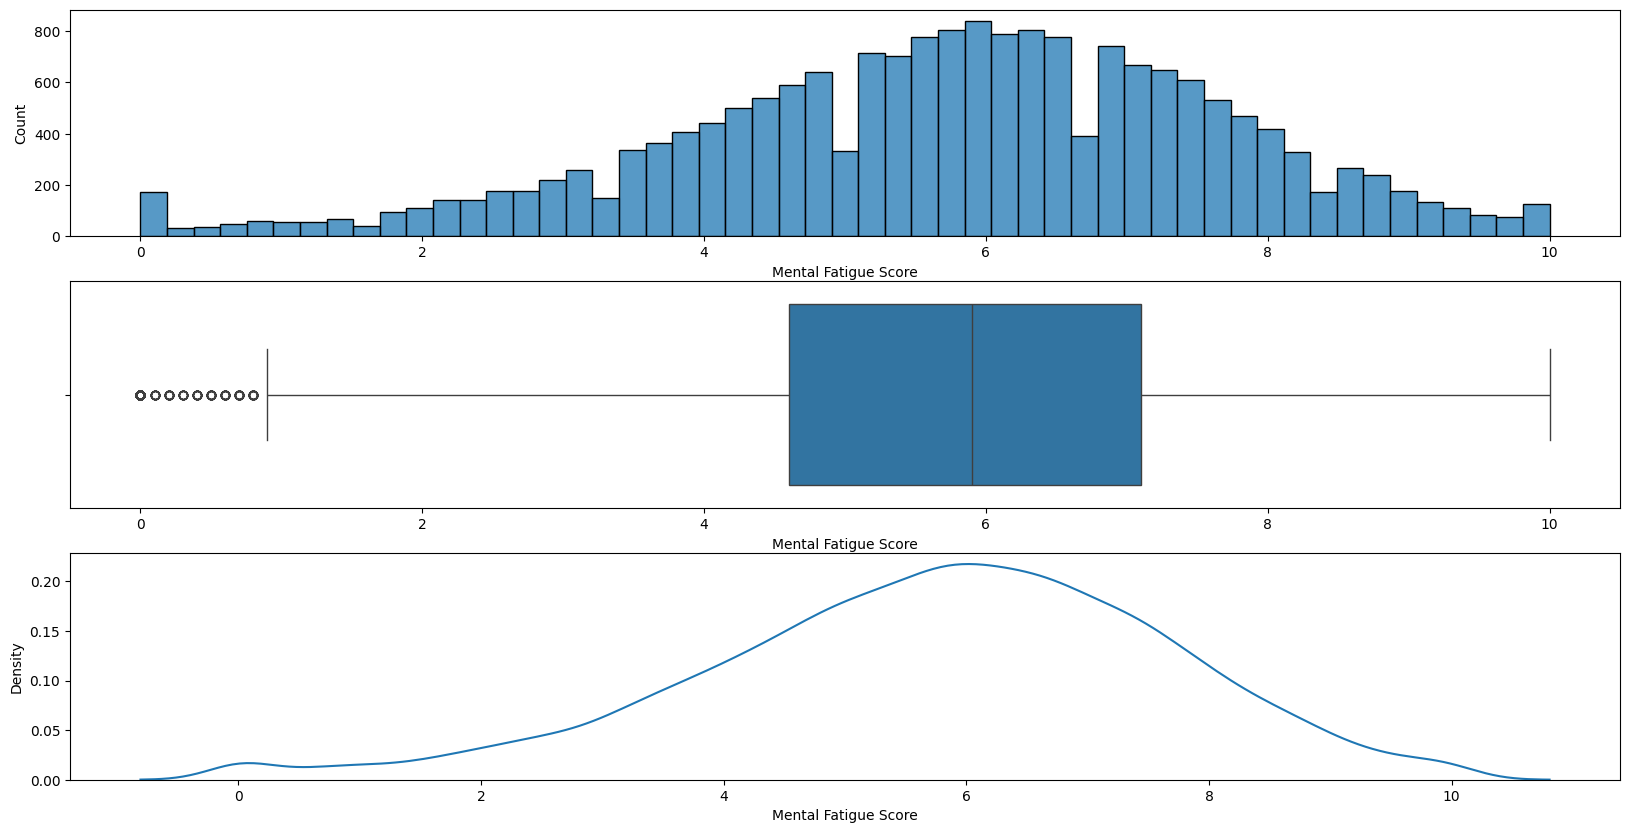

In [19]:
fig,ax=plt.subplots(3,1)
sns.histplot(employee['Mental Fatigue Score'],ax=ax[0])
sns.boxplot(employee['Mental Fatigue Score'],ax=ax[1],orient="h")
sns.kdeplot(employee['Mental Fatigue Score'],ax=ax[2])
plt.show()

# **Feature Engineering: Creating "number of working days" column using "Date of Joining" column**

In [20]:
print(f"Min date: {employee['Date of Joining'].min()}")
print(f"Max date: {employee['Date of Joining'].max()}")

Min date: 2008-01-01 00:00:00
Max date: 2008-12-31 00:00:00


<Axes: xlabel='Month', ylabel='Employees Hired'>

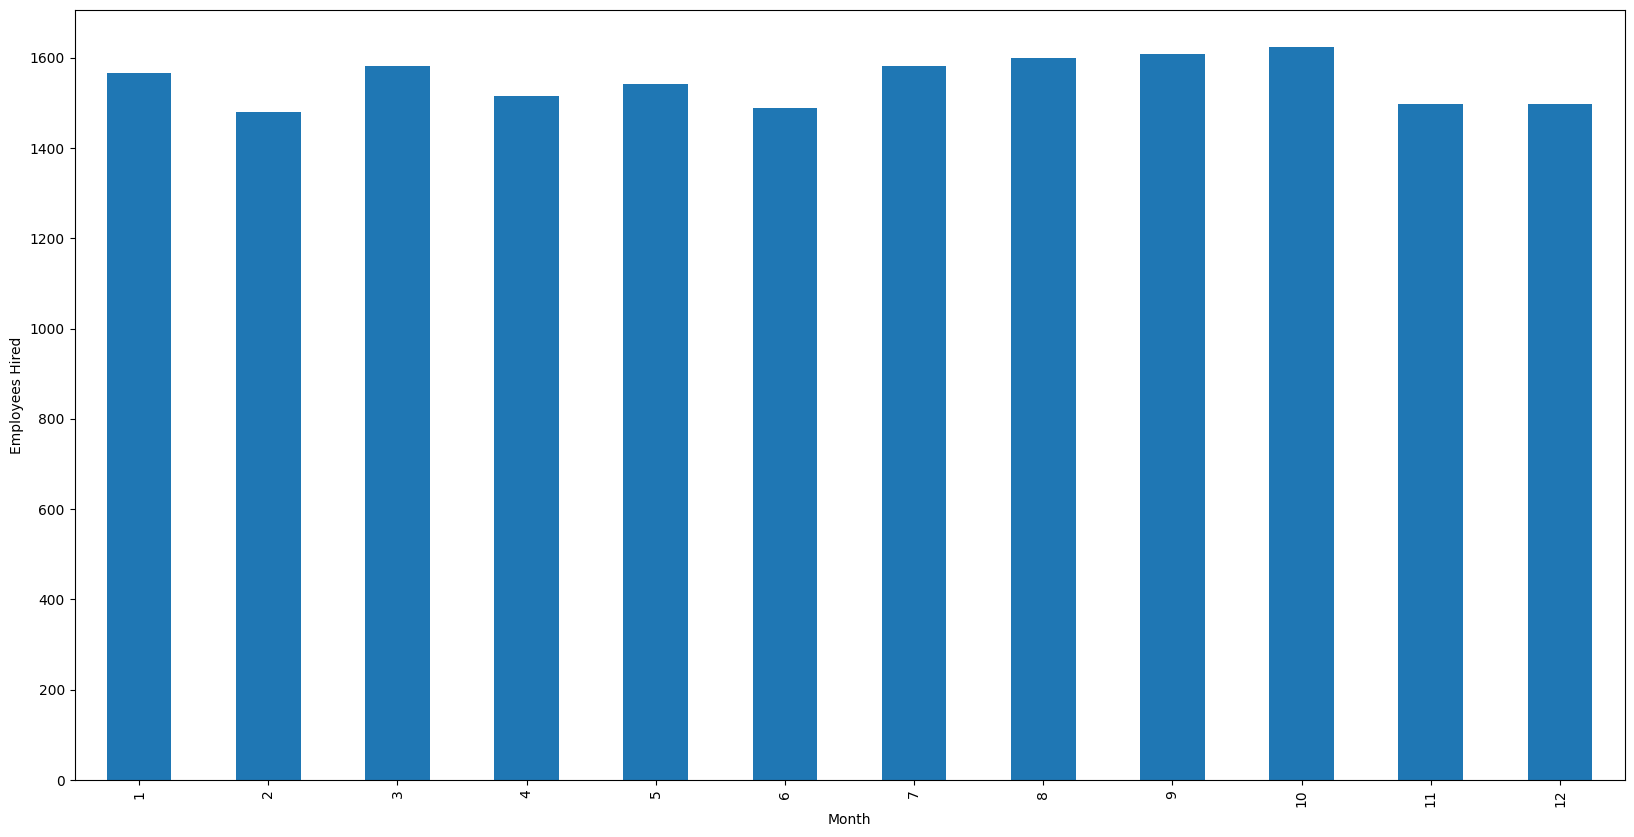

In [21]:
employee["Date of Joining"] = employee["Date of Joining"].astype("datetime64[ns]")
employee["Date of Joining"].groupby(employee["Date of Joining"].dt.month).count().plot(kind="bar", xlabel="Month", ylabel="Employees Hired")

In [22]:
employee_2008 = pd.to_datetime(['2008-01-01']).repeat(len(employee))
employee['No.of working days'] = employee['Date of Joining'].astype('datetime64[ns]').sub(employee_2008).dt.days
employee['No.of working days']

,No.of working days
0,273
1,334
3,307
4,205
5,330
...,...
22743,349
22744,147
22746,18
22748,9


# **Visualizations**

In [23]:
import plotly.express as px

In [24]:
employee_gender = employee.groupby(['Gender']).agg({"Employee ID":"count"}).reset_index()

In [25]:
fig1 = px.bar(employee_gender,x="Gender", y="Employee ID", color="Gender")
fig1.show()

In [26]:
employee_work = employee.groupby(['WFH Setup Available']).agg({"Employee ID":"count"}).reset_index()

In [27]:
fig2 = px.bar(employee_work,x="WFH Setup Available", y="Employee ID", color="WFH Setup Available")
fig2.show()

In [28]:
employee_company = employee.groupby(['Company Type']).agg({"Employee ID":"count"}).reset_index()

In [29]:
fig3 = px.bar(employee_company,x="Company Type", y="Employee ID", color="Company Type")
fig3.show()

In [30]:
employee['Department'] = employee['Designation'].apply(str)

fig = px.bar(employee, x='Department', color='Gender', barmode='group')
fig.update_layout(
    title='Designation Distribution by Gender',
    xaxis_title='Designation',
    yaxis_title='Count'
)
fig.show()

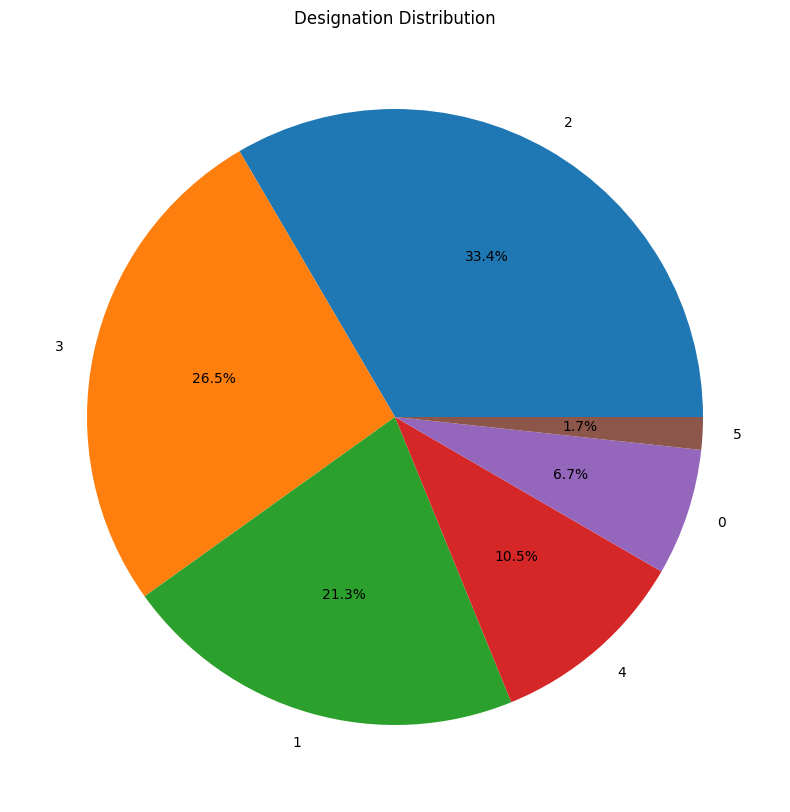

In [31]:
designations = employee['Designation'].value_counts()

# Create a pie chart
plt.figure(figsize=(20,10))
plt.pie(designations, labels = designations.index, autopct='%1.1f%%')
plt.title('Designation Distribution')
plt.show()

# **Co-relation**

In [32]:
employee[['Designation','Resource Allocation','Mental Fatigue Score','Burn Rate','No.of working days']].corr()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,No.of working days
Designation,1.000000,0.877893,0.691823,0.736412,0.002507
Resource Allocation,0.877893,1.000000,0.799563,0.855005,0.002069
Mental Fatigue Score,0.691823,0.799563,1.000000,0.944389,0.000037
Burn Rate,0.736412,0.855005,0.944389,1.000000,0.000309
No.of working days,0.002507,0.002069,0.000037,0.000309,1.000000


<Axes: >

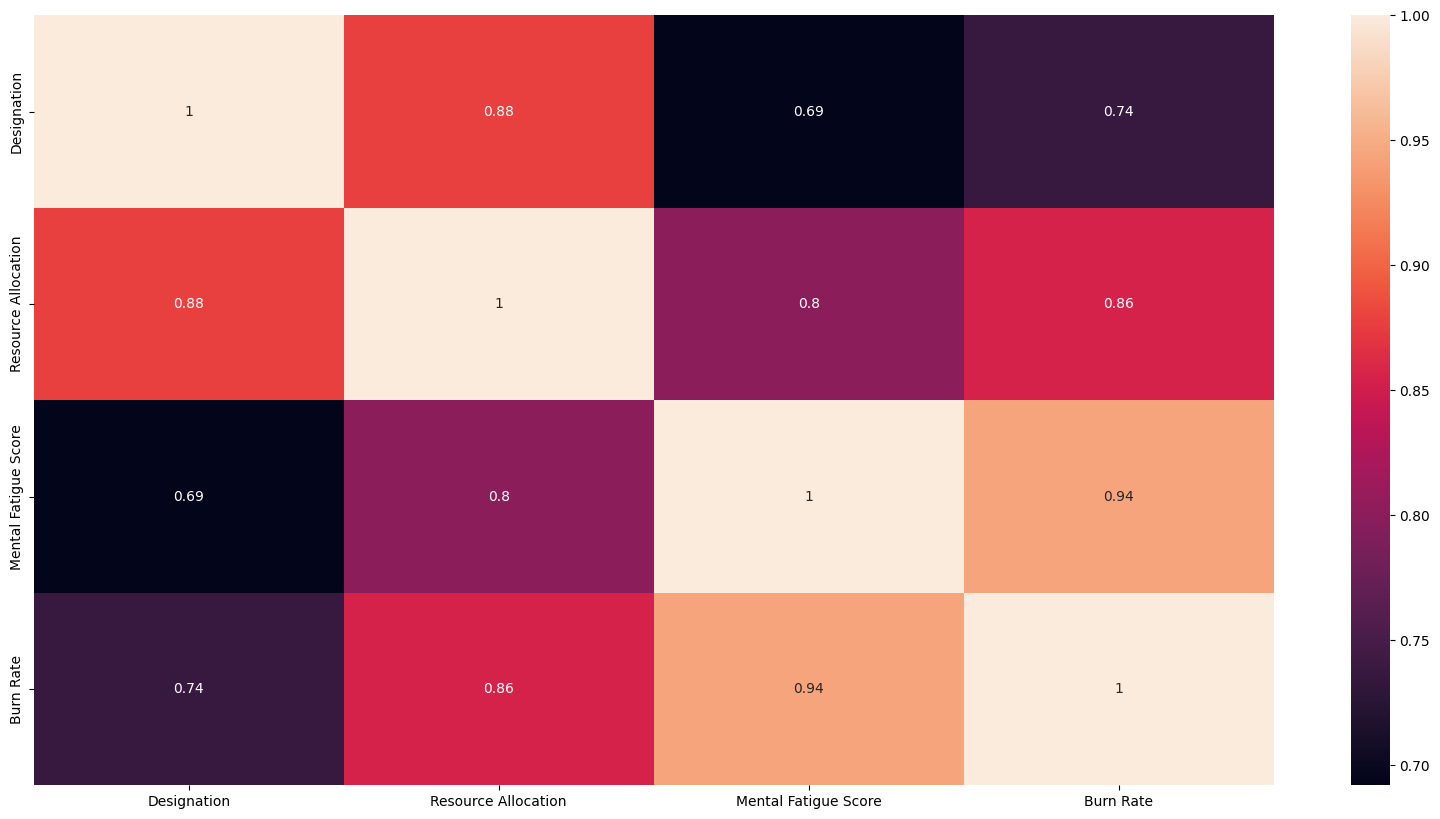

In [33]:
sns.heatmap(employee[['Designation','Resource Allocation','Mental Fatigue Score','Burn Rate']].corr(),annot=True)

# **Dummy variable encoding**

In [34]:
employee = pd.get_dummies(employee, columns=['Gender', 'WFH Setup Available','Company Type'])

In [35]:
employee.head()

,Employee ID,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,No.of working days,Department,Gender_Female,Gender_Male,WFH Setup Available_No,WFH Setup Available_Yes,Company Type_Product,Company Type_Service
0,fffe32003000360033003200,2008-09-30,2,3.0,3.8,0.16,273,2,True,False,True,False,False,True
1,fffe3700360033003500,2008-11-30,1,2.0,5.0,0.36,334,1,False,True,False,True,False,True
3,fffe32003400380032003900,2008-11-03,1,1.0,2.6,0.20,307,1,False,True,False,True,False,True
4,fffe31003900340031003600,2008-07-24,3,7.0,6.9,0.52,205,3,True,False,True,False,False,True
5,fffe3300350037003500,2008-11-26,2,4.0,3.6,0.29,330,2,False,True,False,True,True,False


# **Splitting data into train and test**

In [36]:
x = employee.drop(['Employee ID','Date of Joining','Burn Rate','No.of working days'], axis=1)
Y = employee['Burn Rate']

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.7, random_state=1, shuffle=True)

# Model Development

In [38]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,Y_train)
lr.score(x_test,Y_test)

0.9199255887706531

In [39]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, Y, cv=cv)

array([0.9188908 , 0.92183253, 0.92127832, 0.91882085, 0.92164598])

In [40]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd

def find_best_model_using_gridsearchcv(x, Y):
    algos = {
        'linear_regression': {
            'model': Pipeline([
                ('scaler', StandardScaler()),  # Add a scaler for normalization
                ('regressor', LinearRegression())
            ]),
            'params': {
                'regressor__fit_intercept': [True, False],  # Updated parameter
                'scaler': [None, StandardScaler()]  # Include option for scaling
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],  # Updated parameter
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x, Y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
         })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(x, Y)

,model,best_score,best_params
0,linear_regression,0.920494,"{'regressor__fit_intercept': False, 'scaler': ..."
1,lasso,-0.000433,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.903908,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
